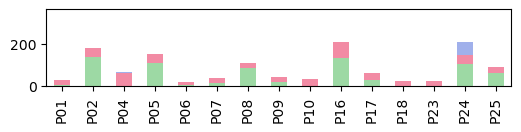

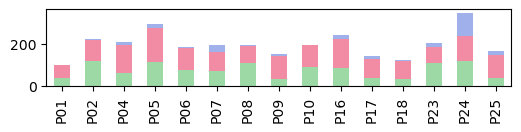

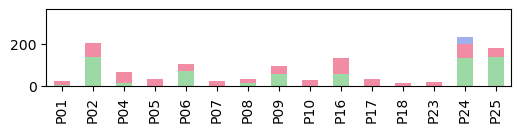

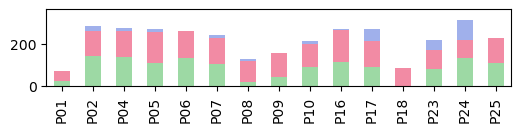

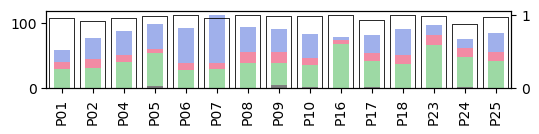

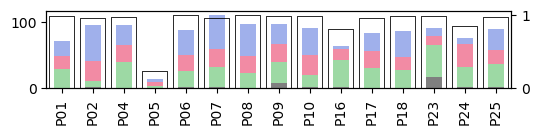

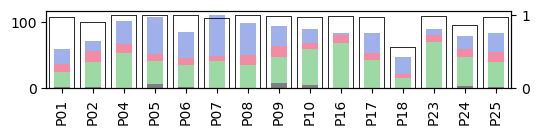

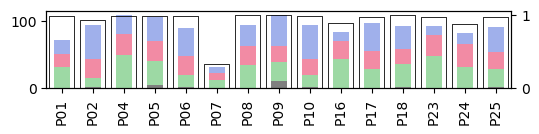

In [18]:
# Get fixation times for each participant on each task
import numpy as np
import pandas as pd
import icua_analysis as ia
import matplotlib.pyplot as plt
import itertools

bins = 50

df = pd.DataFrame(columns=['participant', 'trial', 'task', 'total_fixation', 'event_count'])

for trial, par_data in ia.load_tabularised().has_eyetracking().groupby_trial():
    for par, data in par_data.items():
        intervals = ia.get_fixation_intervals(data)
        event_count = data['eyetracking_data'].shape[0]
        for task in ia.TASKS + ['N']:
            tintervals = intervals[intervals['task'] == task]    
            df.loc[len(df)] = [par, trial, task, (tintervals['t2'] - tintervals['t1']).sum(), event_count]
            
for trial, trial_df in df.groupby('trial'):
    pivot_df = trial_df.pivot(index='participant', columns='task', values='total_fixation')
    pivot_df = pivot_df[['N', 'F', 'S', 'T']] # order for stacking bar chart
    # Plotting
    colors = {task:ia.get_task_properties(task)['color'] for task in df['task'].unique()}
    pivot_df.plot(kind='bar', stacked=True, figsize=(6, 1), color=colors, alpha=0.5, legend=False)
    plt.gca().set_xlabel(None)

    #plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), ncols=4)
    #plt.suptitle(trial)
    # plot count of eyetracking events, if the eyetracker bugs out the this will be shown here as relatively box size
    #plt.gca().set_ylabel('time (s)')
    normalised_duration = (trial_df['event_count'] / trial_df['event_count'].max()) #  * pivot_df.sum(axis=1).max()
    
    # Create a secondary axis
    ax2 = plt.gca().twinx()
    ax2.set_ylim(0,1.05)
    ax2.set_yticks([0,1])
    ax2.bar(trial_df['participant'],  normalised_duration, fill=False, alpha=0.5, linewidth=0.5, edgecolor="black", label="duration")
    
    plt.savefig(f'../result/fixation_duration_{trial}.png', bbox_inches="tight", dpi=300)
    
    
    

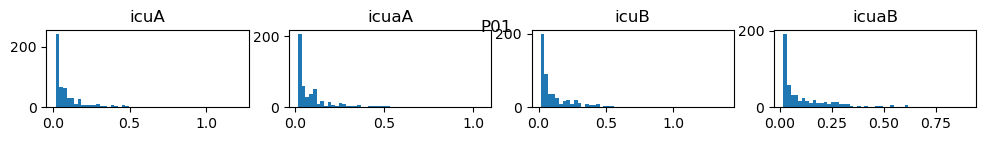

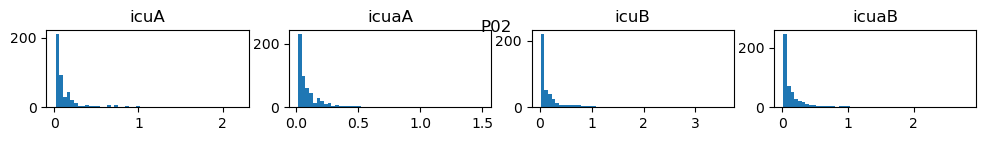

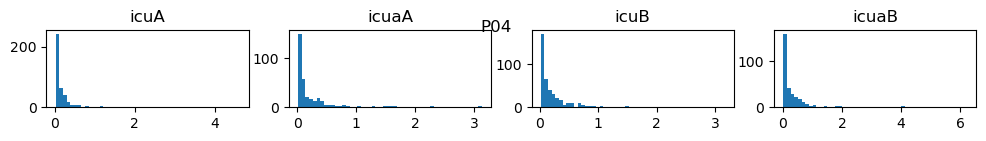

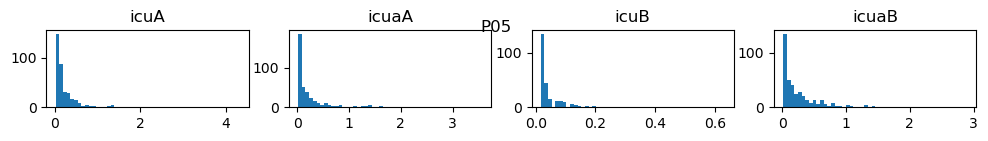

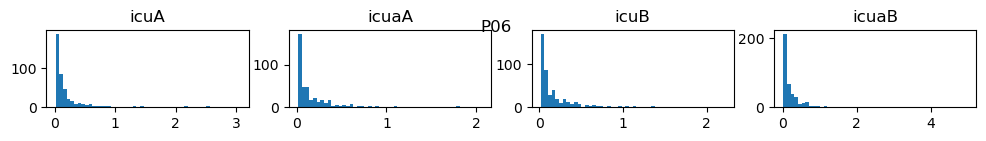

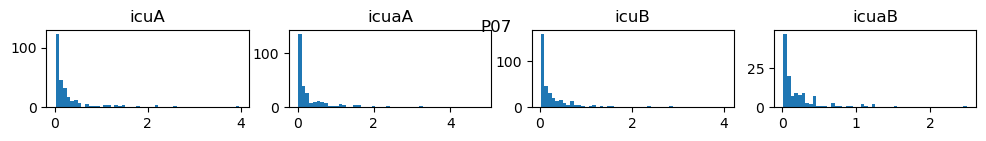

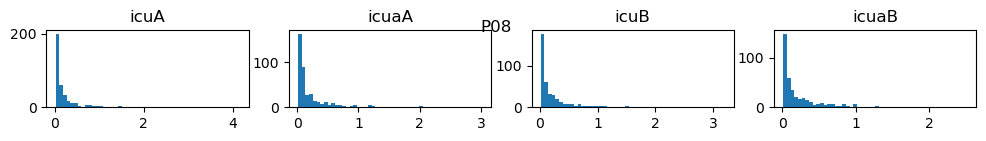

KeyboardInterrupt: 

In [1]:
# Plot distibutions of "fixation" interval lengths. 
import numpy as np
import pandas as pd
import icua_analysis as ia
import matplotlib.pyplot as plt
import itertools

bins = 50
for par, trial_data in ia.load_tabularised().has_eyetracking().groupby_participant():
    fixation = {trial : ia.get_fixation_intervals(data) for trial, data in trial_data.items()}
    fixation = {trial : (data['t2'] - data['t1']) for trial, data in fixation.items()}
    fig, axes = plt.subplots(figsize=(12,1), ncols=4, nrows=1)
    for ax, (trial, dif) in zip(axes.ravel(), fixation.items()):
        ax.hist(dif, bins=50)
        ax.set_title(trial)
    fig.suptitle(par)
    plt.show()

In [ ]:
# DEBUG - checking intervals
import numpy as np
import pandas as pd
import icua_analysis as ia
import matplotlib.pyplot as plt
import itertools

bins = 50
dataset = {key:data for key,data in ia.load_tabularised().has_eyetracking()}
data = dataset[('P16', 'icuB')]
intervals = ia.get_fixation_intervals(data)
ia.plot_intervals(intervals[['t1', 't2']].to_numpy())